In [ ]:
# 1. Gerekli kütüphaneler
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             roc_curve)

import matplotlib.pyplot as plt
import seaborn as sns

import shap
shap.initjs()

# 1.1 Veri setini yükleme (Breast Cancer)
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# 1.2 İlk 5 satır
print("İlk 5 satır:")
display(X.head())
print("Hedef değişken (y) örnekleri:")
display(y.head())


İlk 5 satır:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Hedef değişken (y) örnekleri:


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
print("Eksik değer sayıları:")
missing_counts = X.isnull().sum()
display(missing_counts)

if missing_counts.sum() == 0:
    print("Bu veri setinde eksik değer bulunmamaktadır.")
else:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="mean")
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    print("Eksik değerler mean ile dolduruldu.")


Eksik değer sayıları:


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Bu veri setinde eksik değer bulunmamaktadır.


Her sütundaki aykırı değer sayısı (IQR):


,0
mean radius,14
mean texture,7
mean perimeter,13
mean area,25
mean smoothness,6
mean compactness,16
mean concavity,18
mean concave points,10
mean symmetry,15
mean fractal dimension,15


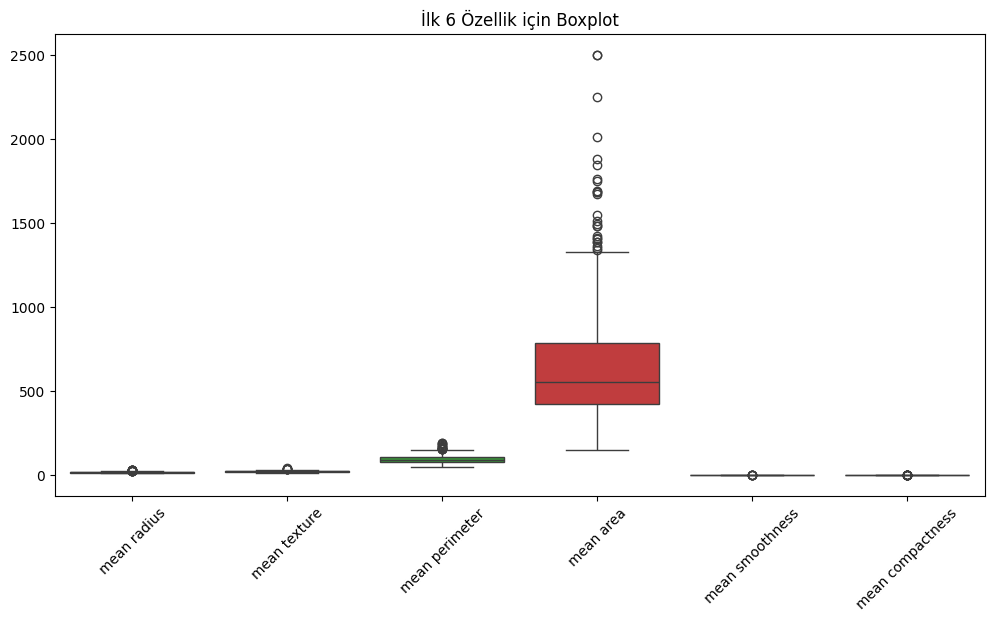

In [ ]:
# IQR ile aykırı değer kontrolü (özet)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()

print("Her sütundaki aykırı değer sayısı (IQR):")
display(outlier_counts)

# Örnek: ilk 6 özellik için boxplot (hepsini aynı grafikte yaparsan çok kalabalık olur)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X.iloc[:, :6])
plt.xticks(rotation=45)
plt.title("İlk 6 Özellik için Boxplot")
plt.show()


In [ ]:
print("Veri tipleri:")
display(X.dtypes)

num_cols = X.select_dtypes(include=[np.number]).shape[1]
cat_cols = X.select_dtypes(exclude=[np.number]).shape[1]

print(f"Sayısal değişken sayısı: {num_cols}")
print(f"Kategorik değişken sayısı: {cat_cols}")


Veri tipleri:


,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


Sayısal değişken sayısı: 30
Kategorik değişken sayısı: 0


In [ ]:
stats = X.describe().T  # mean, std, min, 25%, 50%, 75%, max
stats["median"] = X.median()
stats["Q1"] = X.quantile(0.25)
stats["Q3"] = X.quantile(0.75)
display(stats[["mean", "median", "min", "max", "std", "Q1", "Q3"]])


,mean,median,min,max,std,Q1,Q3
mean radius,14.127292,13.370000,6.981000,28.11000,3.524049,11.700000,15.780000
mean texture,19.289649,18.840000,9.710000,39.28000,4.301036,16.170000,21.800000
mean perimeter,91.969033,86.240000,43.790000,188.50000,24.298981,75.170000,104.100000
mean area,654.889104,551.100000,143.500000,2501.00000,351.914129,420.300000,782.700000
mean smoothness,0.096360,0.095870,0.052630,0.16340,0.014064,0.086370,0.105300
mean compactness,0.104341,0.092630,0.019380,0.34540,0.052813,0.064920,0.130400
mean concavity,0.088799,0.061540,0.000000,0.42680,0.079720,0.029560,0.130700
mean concave points,0.048919,0.033500,0.000000,0.20120,0.038803,0.020310,0.074000
mean symmetry,0.181162,0.179200,0.106000,0.30400,0.027414,0.161900,0.195700
mean fractal dimension,0.062798,0.061540,0.049960,0.09744,0.007060,0.057700,0.066120


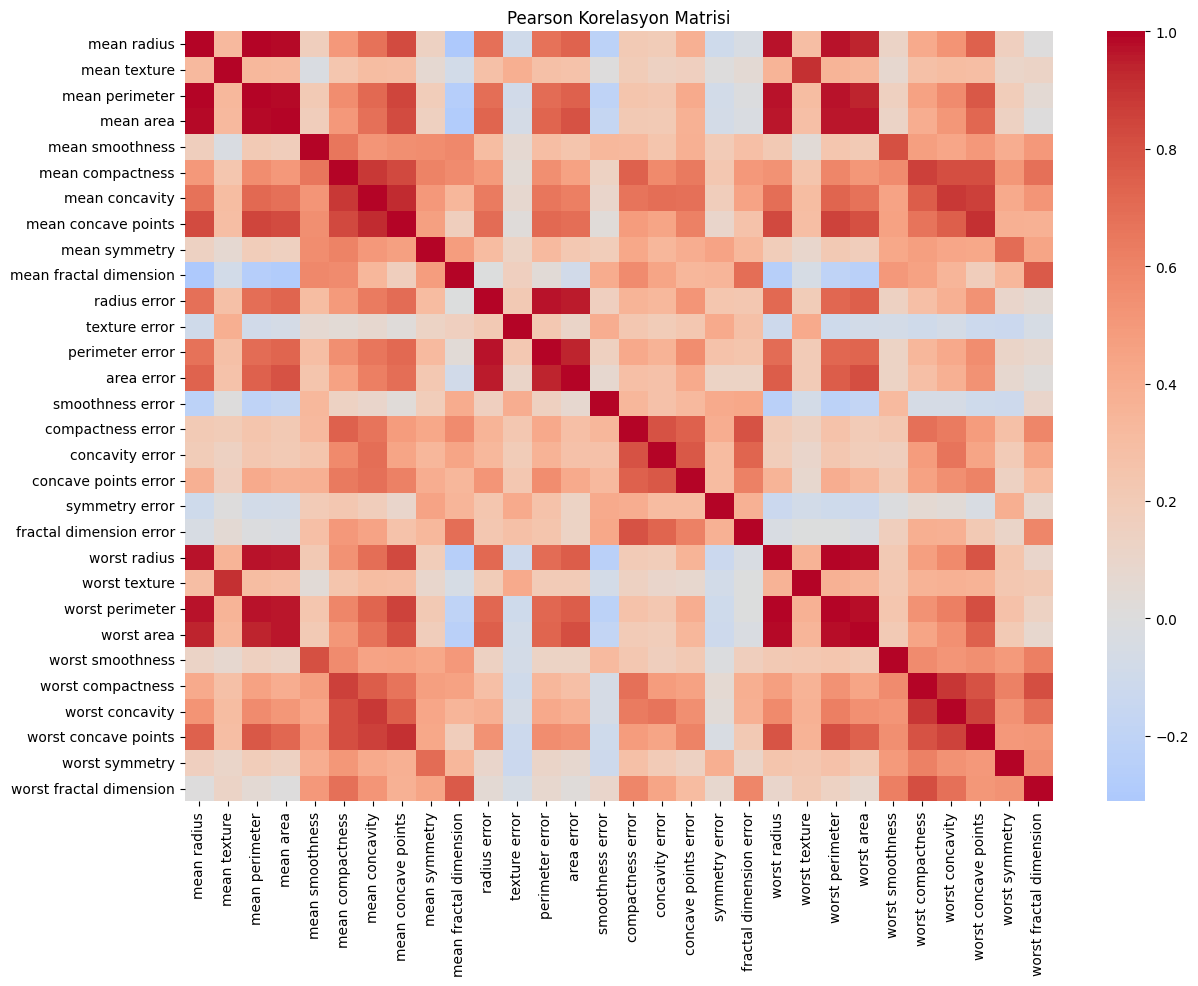

En yüksek korelasyonlu 3 özellik çifti:


,,0
mean perimeter,mean radius,0.997855
worst radius,worst perimeter,0.993708
mean area,mean radius,0.987357


In [ ]:
corr = X.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Pearson Korelasyon Matrisi")
plt.show()

# En yüksek korelasyonlu 3 çift (mutlak değere göre)
corr_abs = corr.abs()
# diagonal'ı sıfır yap
np.fill_diagonal(corr_abs.values, 0)
top_pairs = corr_abs.unstack().sort_values(ascending=False).drop_duplicates().head(3)
print("En yüksek korelasyonlu 3 özellik çifti:")
display(top_pairs)


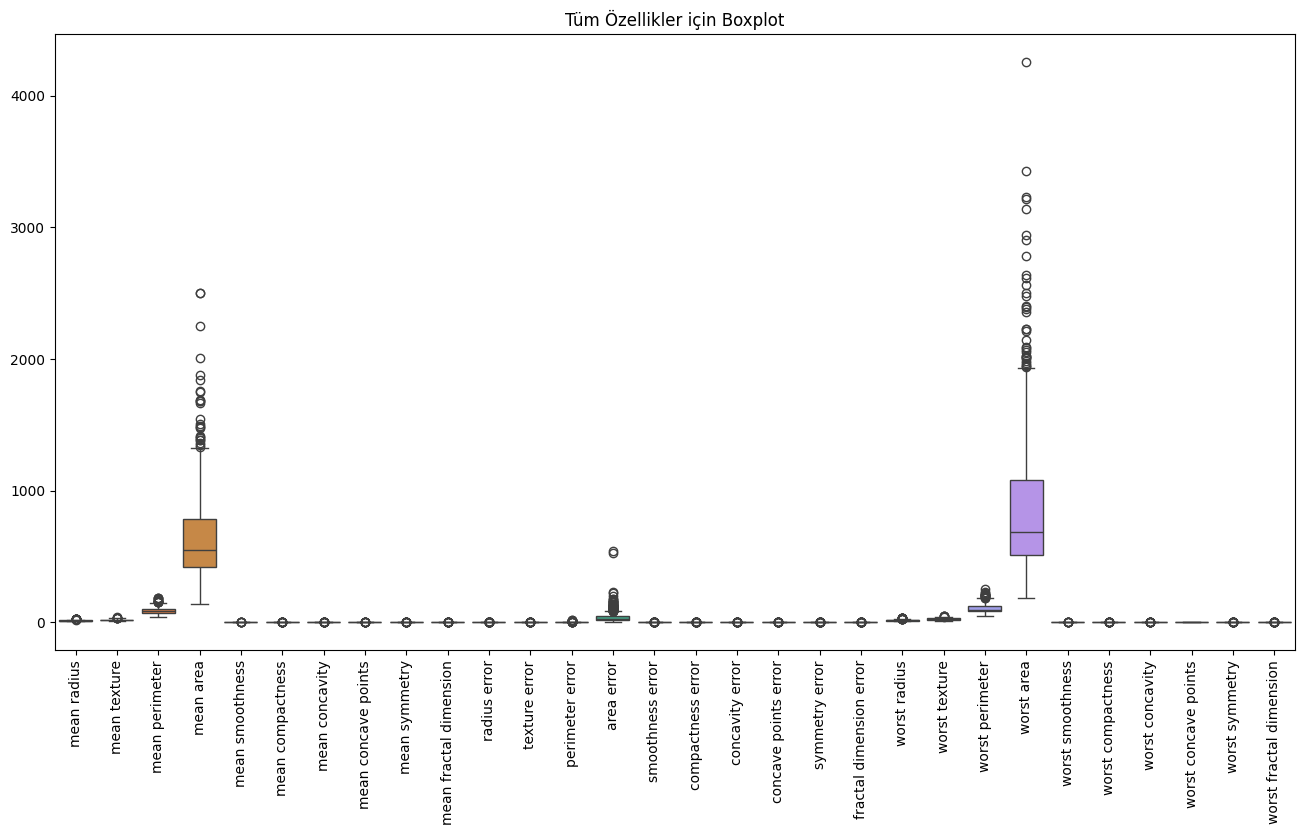

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Tüm Özellikler için Boxplot")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
# Önce train+val ve test (%80 / %20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled_df, y, test_size=0.20, random_state=42, stratify=y
)

# Sonra temp'i train ve val (%70 / %10) olacak şekilde böl
# 0.8 içinden 0.125 => 0.1 (genel)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print("Train boyutu:", X_train.shape[0])
print("Validation boyutu:", X_val.shape[0])
print("Test boyutu:", X_test.shape[0])


Train boyutu: 398
Validation boyutu: 57
Test boyutu: 114


Ortalama explained variance ratio: 0.03333333333333333
Seçilen PCA bileşen sayısı: 6


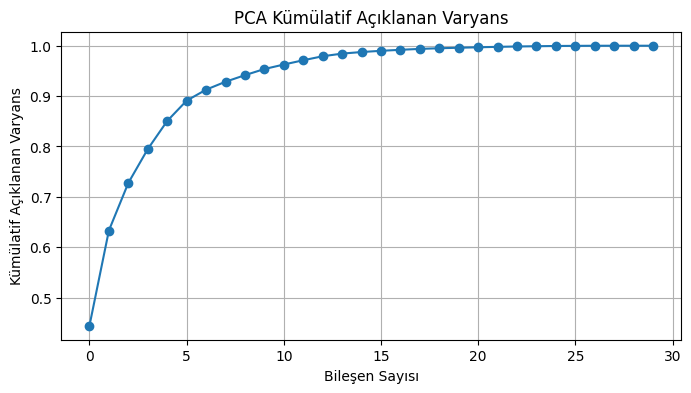

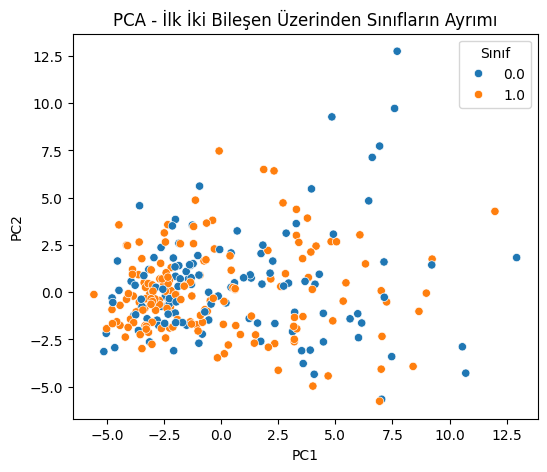

In [ ]:
# PCA'yı önce tüm bileşenlerle fit ediyoruz
pca_full = PCA()
pca_full.fit(X_train)

explained_var_ratio = pca_full.explained_variance_ratio_
mean_var_ratio = explained_var_ratio.mean()

# Ortalama oranı geçen bileşen sayısı
n_components_pca = sum(explained_var_ratio > mean_var_ratio)
print("Ortalama explained variance ratio:", mean_var_ratio)
print("Seçilen PCA bileşen sayısı:", n_components_pca)

# PCA'yı seçilen bileşen sayısıyla yeniden fit et
pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train)
X_val_pca   = pca.transform(X_val)
X_test_pca  = pca.transform(X_test)

pca_cols = [f"PC{i+1}" for i in range(n_components_pca)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols)
X_val_pca_df   = pd.DataFrame(X_val_pca, columns=pca_cols)
X_test_pca_df  = pd.DataFrame(X_test_pca, columns=pca_cols)

# Explained variance grafiği
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_var_ratio), marker="o")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Açıklanan Varyans")
plt.title("PCA Kümülatif Açıklanan Varyans")
plt.grid(True)
plt.show()

# İlk iki PCA bileşeniyle scatter
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_train_pca_df["PC1"], y=X_train_pca_df["PC2"], hue=y_train)
plt.title("PCA - İlk İki Bileşen Üzerinden Sınıfların Ayrımı")
plt.legend(title="Sınıf")
plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Breast Cancer veri seti 2 sınıflı olduğu için max n_components = 1
lda = LinearDiscriminantAnalysis(n_components=1)

X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda   = lda.transform(X_val)
X_test_lda  = lda.transform(X_test)

lda_cols = ["LD1"]
X_train_lda_df = pd.DataFrame(X_train_lda, columns=lda_cols)
X_val_lda_df   = pd.DataFrame(X_val_lda, columns=lda_cols)
X_test_lda_df  = pd.DataFrame(X_test_lda, columns=lda_cols)


In [ ]:
# Veri temsillerini tek bir yapı içinde tutalım
representations = {
    "raw": (X_train, X_val, X_test),
    "pca": (X_train_pca_df, X_val_pca_df, X_test_pca_df),
    "lda": (X_train_lda_df, X_val_lda_df, X_test_lda_df)
}

# Modeller
models_def = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    ),
    "GaussianNB": GaussianNB()
}

results = []
trained_models = {}  # (representation, model_name) -> fitted model

for rep_name, (X_tr, X_v, X_te) in representations.items():
    for model_name, model in models_def.items():
        clf = model
        clf.fit(X_tr, y_train)
        trained_models[(rep_name, model_name)] = clf

        # Tahminler
        y_val_pred = clf.predict(X_v)
        if hasattr(clf, "predict_proba"):
            y_val_proba = clf.predict_proba(X_v)[:, 1]
        else:
            # predict_proba yoksa decision_function kullanılır, ROC-AUC için
            from sklearn.preprocessing import MinMaxScaler
            scores = clf.decision_function(X_v)
            scaler_tmp = MinMaxScaler()
            y_val_proba = scaler_tmp.fit_transform(scores.reshape(-1, 1)).ravel()

        acc  = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred)
        rec  = recall_score(y_val, y_val_pred)
        f1   = f1_score(y_val, y_val_pred)
        auc  = roc_auc_score(y_val, y_val_proba)

        results.append({
            "Representation": rep_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1,
            "ROC_AUC": auc
        })

results_df = pd.DataFrame(results)
display(results_df.sort_values(by="F1", ascending=False))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:38:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:38:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:38:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Representation,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,raw,LogisticRegression,0.964912,0.972222,0.972222,0.972222,0.996032
5,pca,LogisticRegression,0.964912,0.972222,0.972222,0.972222,0.994709
6,pca,DecisionTree,0.964912,0.972222,0.972222,0.972222,0.962302
8,pca,XGBoost,0.964912,0.972222,0.972222,0.972222,0.982804
7,pca,RandomForest,0.964912,0.972222,0.972222,0.972222,0.976190
2,raw,RandomForest,0.947368,0.945946,0.972222,0.958904,0.976190
10,lda,LogisticRegression,0.929825,0.900000,1.000000,0.947368,0.957672
14,lda,GaussianNB,0.929825,0.900000,1.000000,0.947368,0.957672
13,lda,XGBoost,0.929825,0.921053,0.972222,0.945946,0.958995
3,raw,XGBoost,0.929825,0.921053,0.972222,0.945946,0.985450


In [ ]:
# En iyi modeli seç (F1'e göre)
best_row = results_df.sort_values(by="F1", ascending=False).iloc[0]
best_rep = best_row["Representation"]
best_model_name = best_row["Model"]

print("En iyi model temsili:", best_rep)
print("En iyi model:", best_model_name)
print("Validation F1:", best_row["F1"])

best_model = trained_models[(best_rep, best_model_name)]

# İlgili temsildeki test verisini al
X_tr_best, X_val_best, X_te_best = representations[best_rep]

# İstersen train+val üzerine yeniden eğit (daha iyi genelleme için)
X_train_full = pd.concat([X_tr_best, X_val_best])
y_train_full = pd.concat([y_train, y_val])

best_model.fit(X_train_full, y_train_full)

# Test performansı
y_test_pred = best_model.predict(X_te_best)
if hasattr(best_model, "predict_proba"):
    y_test_proba = best_model.predict_proba(X_te_best)[:, 1]
else:
    from sklearn.preprocessing import MinMaxScaler
    scores = best_model.decision_function(X_te_best)
    scaler_tmp = MinMaxScaler()
    y_test_proba = scaler_tmp.fit_transform(scores.reshape(-1, 1)).ravel()

test_acc  = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec  = recall_score(y_test, y_test_pred)
test_f1   = f1_score(y_test, y_test_pred)
test_auc  = roc_auc_score(y_test, y_test_proba)

print("=== Test Performansı ===")
print("Accuracy :", test_acc)
print("Precision:", test_prec)
print("Recall   :", test_rec)
print("F1-score :", test_f1)
print("ROC-AUC  :", test_auc)


En iyi model temsili: raw
En iyi model: LogisticRegression
Validation F1: 0.9722222222222222
=== Test Performansı ===
Accuracy : 0.9824561403508771
Precision: 0.9861111111111112
Recall   : 0.9861111111111112
F1-score : 0.9861111111111112
ROC-AUC  : 0.9953703703703703


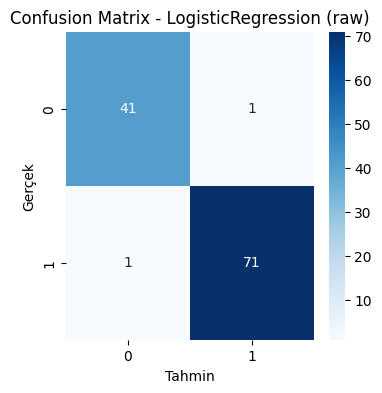

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title(f"Confusion Matrix - {best_model_name} ({best_rep})")
plt.show()


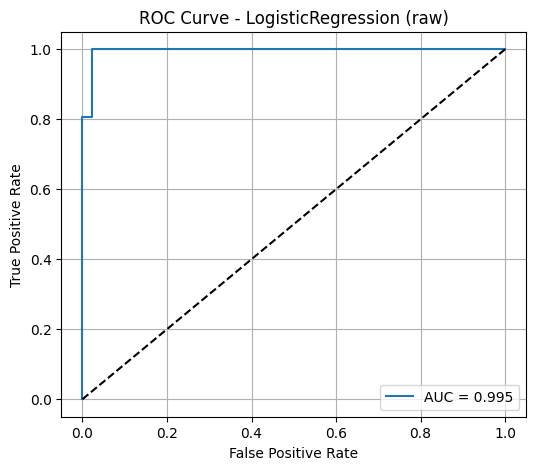

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name} ({best_rep})")
plt.legend()
plt.grid(True)
plt.show()


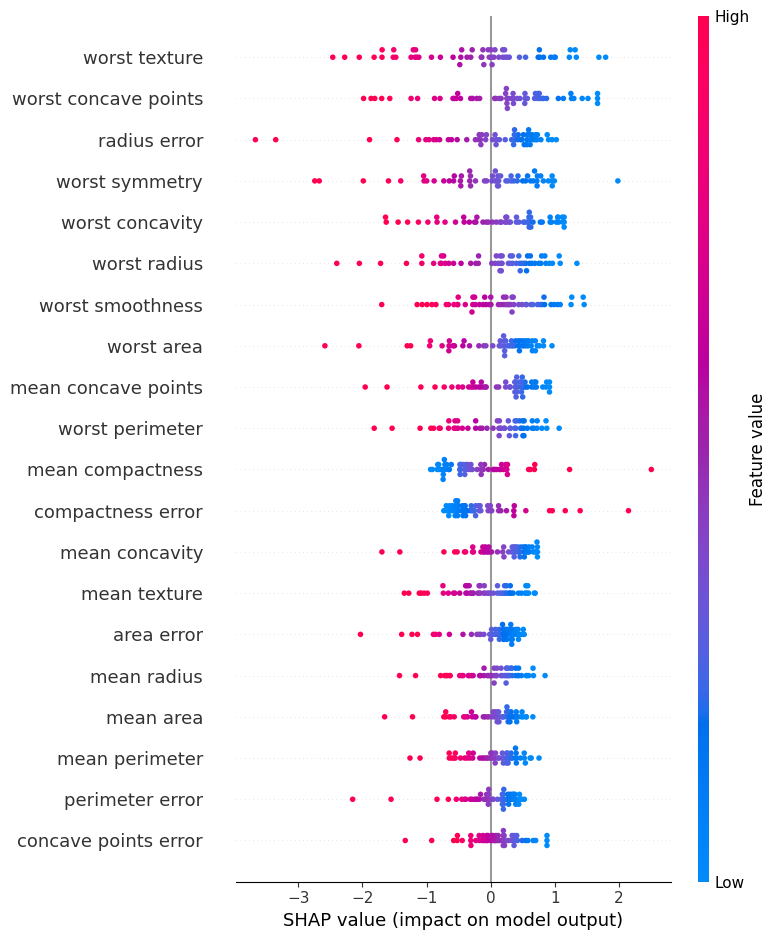

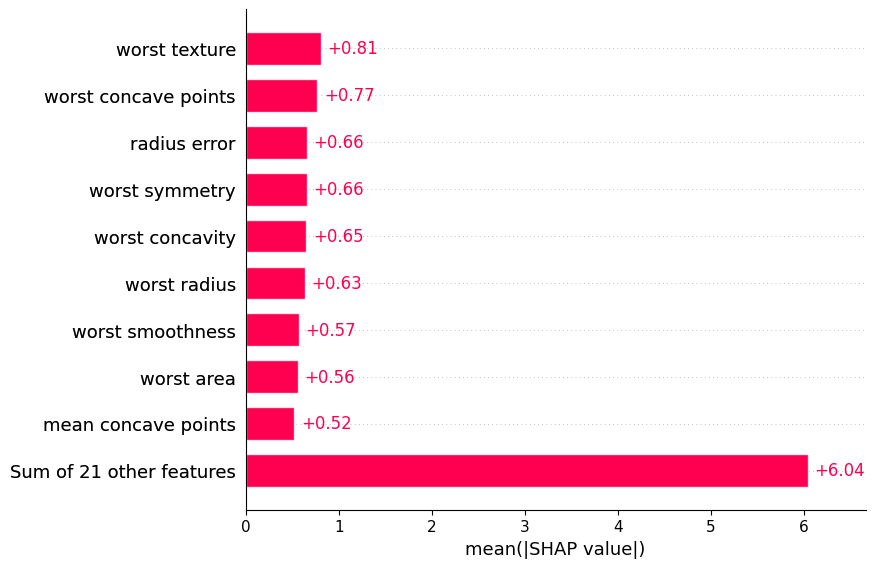

In [ ]:
# En iyi modelin kullandığı özelliğe göre bir DataFrame oluşturalım
if best_rep == "raw":
    X_train_rep = X_train_full
    X_val_rep   = X_val_best  # validation seti
    feature_names_best = X.columns.tolist()
elif best_rep == "pca":
    X_train_rep = X_train_full
    X_val_rep   = X_val_best
    feature_names_best = pca_cols
elif best_rep == "lda":
    X_train_rep = X_train_full
    X_val_rep   = X_val_best
    feature_names_best = lda_cols

# SHAP Explainer
explainer = shap.Explainer(best_model, X_train_rep)
shap_values = explainer(X_val_rep)

# summary_plot
shap.summary_plot(shap_values, X_val_rep, feature_names=feature_names_best)

# bar_plot (ortalama etki büyüklükleri)
shap.plots.bar(shap_values, max_display=10)


PCA Temsili için SHAP Summary Plot:


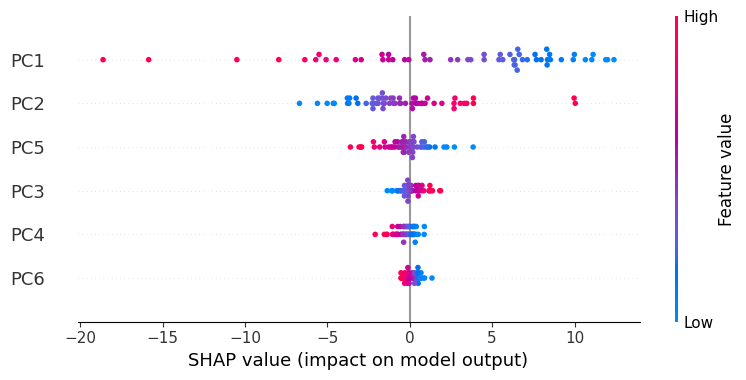

LDA Temsili için SHAP Summary Plot:


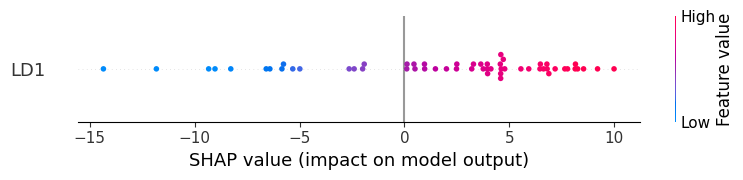

In [ ]:
# Aynı model tipini PCA ve LDA için de kullan
model_cls = type(best_model)

# PCA
X_tr_pca, X_v_pca, X_te_pca = representations["pca"]
model_pca = model_cls()
model_pca.fit(X_tr_pca, y_train)
explainer_pca = shap.Explainer(model_pca, X_tr_pca)
shap_values_pca = explainer_pca(X_v_pca)

print("PCA Temsili için SHAP Summary Plot:")
shap.summary_plot(shap_values_pca, X_v_pca, feature_names=pca_cols)

# LDA
X_tr_lda, X_v_lda, X_te_lda = representations["lda"]
model_lda = model_cls()
model_lda.fit(X_tr_lda, y_train)
explainer_lda = shap.Explainer(model_lda, X_tr_lda)
shap_values_lda = explainer_lda(X_v_lda)

print("LDA Temsili için SHAP Summary Plot:")
shap.summary_plot(shap_values_lda, X_v_lda, feature_names=lda_cols)


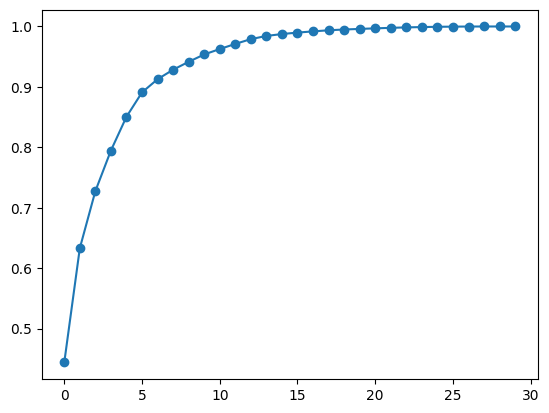

In [ ]:
plt.plot(np.cumsum(explained_var_ratio), marker="o")


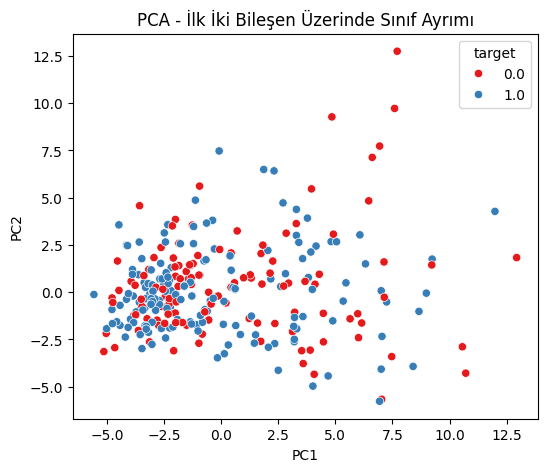

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_train_pca_df["PC1"],
    y=X_train_pca_df["PC2"],
    hue=y_train,
    palette="Set1"
)
plt.title("PCA - İlk İki Bileşen Üzerinde Sınıf Ayrımı")
plt.show()


In [ ]:
plt.figure(figsize=(7,3))
sns.scatterplot(
    x=X_train_lda_df["LD1"],
    y=[0]*len(X_train_lda_df),
    hue=y_train,
    palette="Set1"
)
plt.title("LDA - Tek Bileşen Üzerinde Sınıfların Ayrımı (LD1)")
plt.yticks([])
plt.show()


ValueError: array length 398 does not match index length 511

<Figure size 700x300 with 0 Axes>

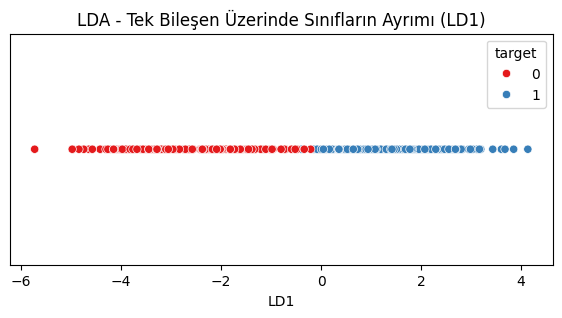

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LD1 ve hedefi aynı DataFrame'de topla
lda_plot_df = pd.DataFrame({
    "LD1": X_train_lda_df["LD1"].values,
    "target": y_train.values[:len(X_train_lda_df)]  # uzunluk eşitleme
})

plt.figure(figsize=(7, 3))
sns.scatterplot(
    data=lda_plot_df,
    x="LD1",
    y=[0] * len(lda_plot_df),
    hue="target",
    palette="Set1"
)
plt.title("LDA - Tek Bileşen Üzerinde Sınıfların Ayrımı (LD1)")
plt.yticks([])
plt.xlabel("LD1")
plt.show()
